<a href="https://www.kaggle.com/code/prasadposture121/spaceship-titanic?scriptVersionId=103639566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center>Spaceship Titanic<center><h1>

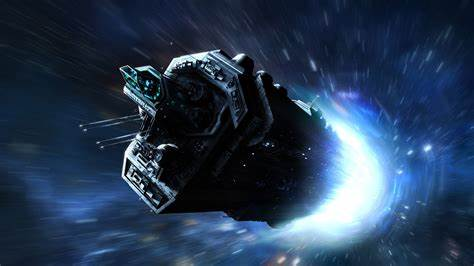

### Content:  
1. Description  
1. Task
1. Importing Libraries  
1. Loading The Data  
1. Column Description  
1. Exploring Data Analysis  
1. Data Visualization  
1. Missing Values  
1. Feature Engineering  
1. Modeling  
1. Predictions  

### Description

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!
___

### Task
The task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. For helping us to make these predictions,there is a set of personal records recovered from the ship's damaged computer system provided to us.

### Importing libraries

In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

#Important functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Loading the data

In [2]:
train_df=pd.read_csv('../input/spaceship-titanic/train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_df=pd.read_csv('../input/spaceship-titanic/test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Column Description
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Exploratory Data Analysis

In [4]:
train_df.shape #(Rows,Columns)

(8693, 14)

In [5]:
test_df.shape #(Rows,Columns)

(4277, 13)

In [6]:
train_df.info() #all features, total number of tuples and data type of `train` data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test_df.info() #all features, total number of tuples and data type of `test` data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
#Statistical Information
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
#Statistical Information
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [10]:
#Stastical information of the categorical data
#train data
train_df.describe(include = ["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [11]:
#Stastical information of the categorical data
#test data
test_df.describe(include = ["O"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


### Data Visualization
Now we will find effect of each attribute on the transportation to alternate dimenstion.

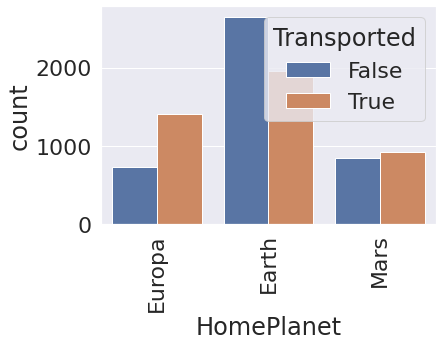

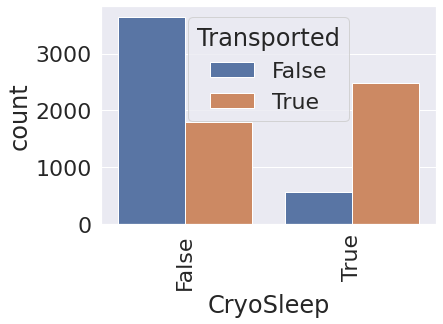

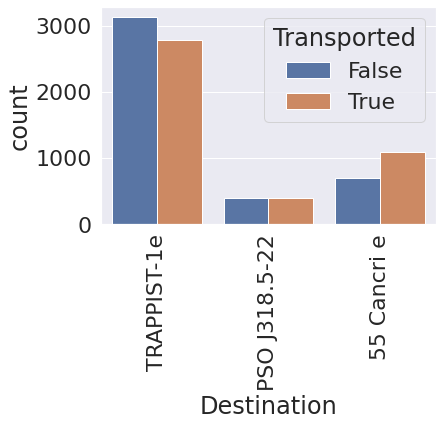

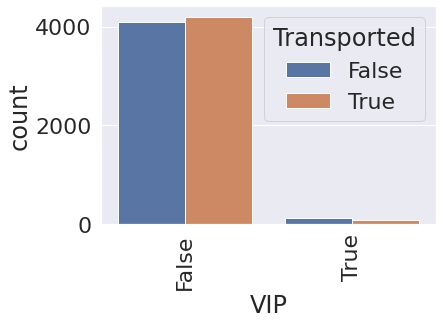

In [12]:
#We will try to find the relationship of some siginificant categorical attributes with transportation
def plot_transported(param):
    g = sns.countplot(train_df[param],hue=train_df.Transported)
    plt.xticks(rotation=90);
    plt.show()
attributes=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for attribute in attributes:
    plot_transported(attribute)

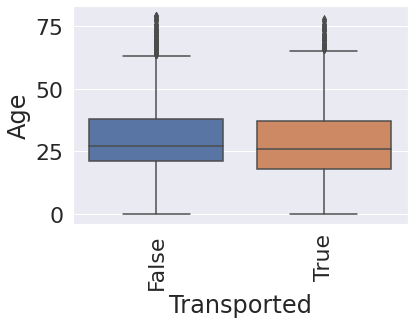

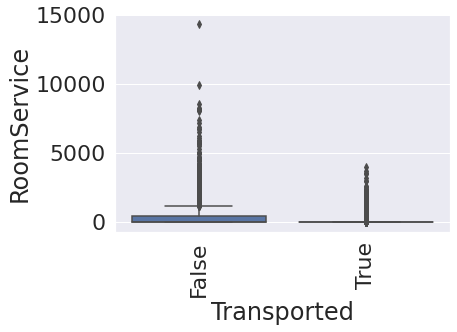

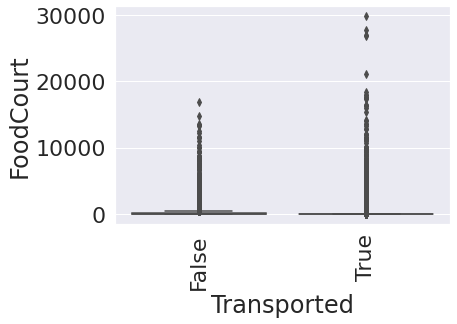

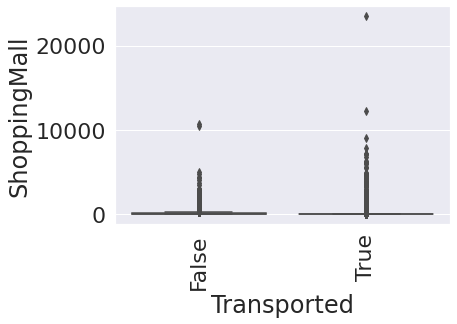

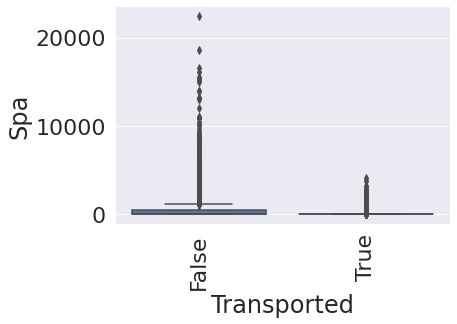

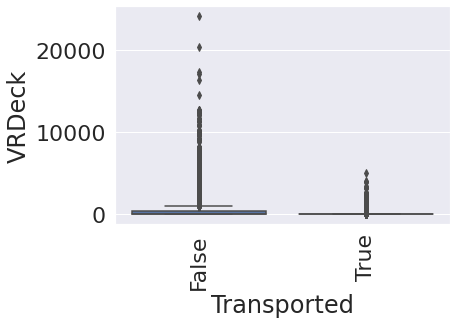

In [13]:
#Now we will try to find the relationship of numerical attributes with transportation
def plt_transported(param):
    sns.boxplot(y=train_df[param],x=train_df.Transported)
    plt.xticks(rotation=90);
    plt.show()
attributes=[ 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for attribute in attributes:
    plt_transported(attribute)

### Missing Values

**Getting the missing values :** We will find out all the missing values from the dataset using `insa()`.

In [14]:
#Missing values from the train data
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
#Missing vales from the test data
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

**Filling the missing values:** We will fill the missing values using the available stastical information about the dataset and with a little common sense.

In [16]:
#these servieces seem to be in the category of laxury better we put the expenditure on them as zero for null values
train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [17]:
#filling median of ages for missing ages so that we don't get much deviation
train_df['Age'] =train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] =test_df['Age'].fillna(test_df['Age'].median())

In [18]:
#assuming that if people were infact travelling with 'VIP' there would be a record of it
train_df['VIP']=train_df['VIP'].fillna(False)
test_df['VIP']=test_df['VIP'].fillna(False)

In [19]:
#from stastical information we can observe that the Earth is home planet for most passengers
train_df['HomePlanet'] =train_df['HomePlanet'].fillna('Earth')
test_df['HomePlanet'] =test_df['HomePlanet'].fillna('Earth')

In [20]:
#from statistical information the most frequent destination is TRAPPIST-1e
train_df['Destination']=train_df['Destination'].fillna("TRAPPIST-1e")
test_df['Destination']=test_df['Destination'].fillna("TRAPPIST-1e")

In [21]:
#Assuming that the null_valued passengers aren't kept in crayo sleep
train_df['CryoSleep'] =train_df['CryoSleep'].fillna(False)
test_df['CryoSleep'] =test_df['CryoSleep'].fillna(False)

In [22]:
#Filling the most used cabin
train_df['Cabin'] =train_df['Cabin'].fillna('G/734/S')
test_df['Cabin'] =test_df['Cabin'].fillna('G/734/S')

### Feature Engineering

Replacing default ID with PassengerID

In [23]:
#Since there are no null values in passenger ID we can directly use it as default ID
#setting PassengerId as the Id
train_df.set_index('PassengerId',inplace=True)
test_df.set_index('PassengerId',inplace=True)

We can observe that the stastical information shows that Cabin has lot of unique values therefore this attribute seems highly unlike to play any significant role in transportation of the people into alternate dimension however from the column descrptions one can figure out that it takes form deck/num/side, therefore the combinations of these may not be unique but if we seperate them into new attributes then each attribute may have less common values/

In [24]:
train_df[['Deck','Num','Side']] = train_df.Cabin.str.split('/',expand=True)
test_df[['Deck','Num','Side']] = test_df.Cabin.str.split('/',expand=True)

In [25]:
train_df[['Deck','Num','Side']].describe(include='O')

,Deck,Num,Side
count,8693,8693,8693
unique,8,1817,2
top,F,734,S
freq,2794,208,4487


In [26]:
test_df[['Deck','Num','Side']].describe(include='O')

,Deck,Num,Side
count,4277,4277,4277
unique,8,1505,2
top,F,734,S
freq,1445,104,2193


As we can see here that the except for the `Num` all the other attributes have very less unique values hence we'll have to keep them while dropping the Num column also we have degenerated Cabin will have drop that as well.

**Dropping Columns :** Here we will drop columns which aren't significant

In [27]:
train_df= train_df.drop(['Name','Cabin','Num'],axis=1)
test_df= test_df.drop(['Name','Cabin','Num'],axis=1)

**Labelling the categorical data**

In [28]:
cat_attributes= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side']
for i in cat_attributes:
    le=LabelEncoder()
    arr=np.concatenate((train_df[i], test_df[i])).astype(str)
    le.fit(arr)
    train_df[i]=le.transform(train_df[i].astype(str))
    test_df[i]=le.transform(test_df[i].astype(str))

In [29]:
train_df['Transported']=train_df['Transported'].replace({True:1,False:0})

### Modeling

In [30]:
#Seperating Response Variable from the dataset
X=train_df.drop('Transported',axis=1)
y=train_df['Transported']

In [31]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Side'],
      dtype='object')

In [32]:
#train_test_split()
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [33]:
#Models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT',DecisionTreeClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier()))

In [34]:
#Evaluation of models
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)#random_state=1
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.782477 (0.011637)
DT: 0.740756 (0.009208)
LDA: 0.762228 (0.017572)
KNN: 0.776345 (0.011514)
NB: 0.702712 (0.014508)
SVM: 0.740757 (0.013111)
RFC: 0.793063 (0.009927)


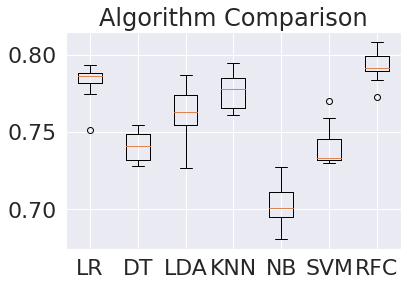

In [35]:
#Compare our models
plt.boxplot(results,labels=names)
plt.title("Algorithm Comparison")
plt.show()

**Fitting the model**

In [36]:
#We will continue with best performing algorithm i.e. RandomForestClassifier 
rf = RandomForestClassifier()

In [37]:
#fitting model to train data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
pred_y=rf.predict(X_val)
pred=rf.predict(X_train)   
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.9493787390704096
0.7934682612695492


In [39]:
#fitting model to entire data
rf.fit(X,y)

RandomForestClassifier()

In [40]:
#Predicting on whole data
pred=rf.predict(X)   
print(accuracy_score(y.values,pred))

0.9451282641205567


### Predictions

In [41]:
y_pred = rf.predict(test_df)
submission=pd.DataFrame({'Transported':y_pred.astype(bool)},index=test_df.index)
submission.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [42]:
y_pred
m=0
n=0
for i in y_pred:
    if i==0:
        m+=1
    else:
        n+=1
print(m,'people have been transported safely.')
print(n,'people have been transported to the alternate dimension.')

2255 people have been transported safely.
2022 people have been transported to the alternate dimension.


In [43]:
#Saving this file for submissions
submission.to_csv('submission.csv')

The End